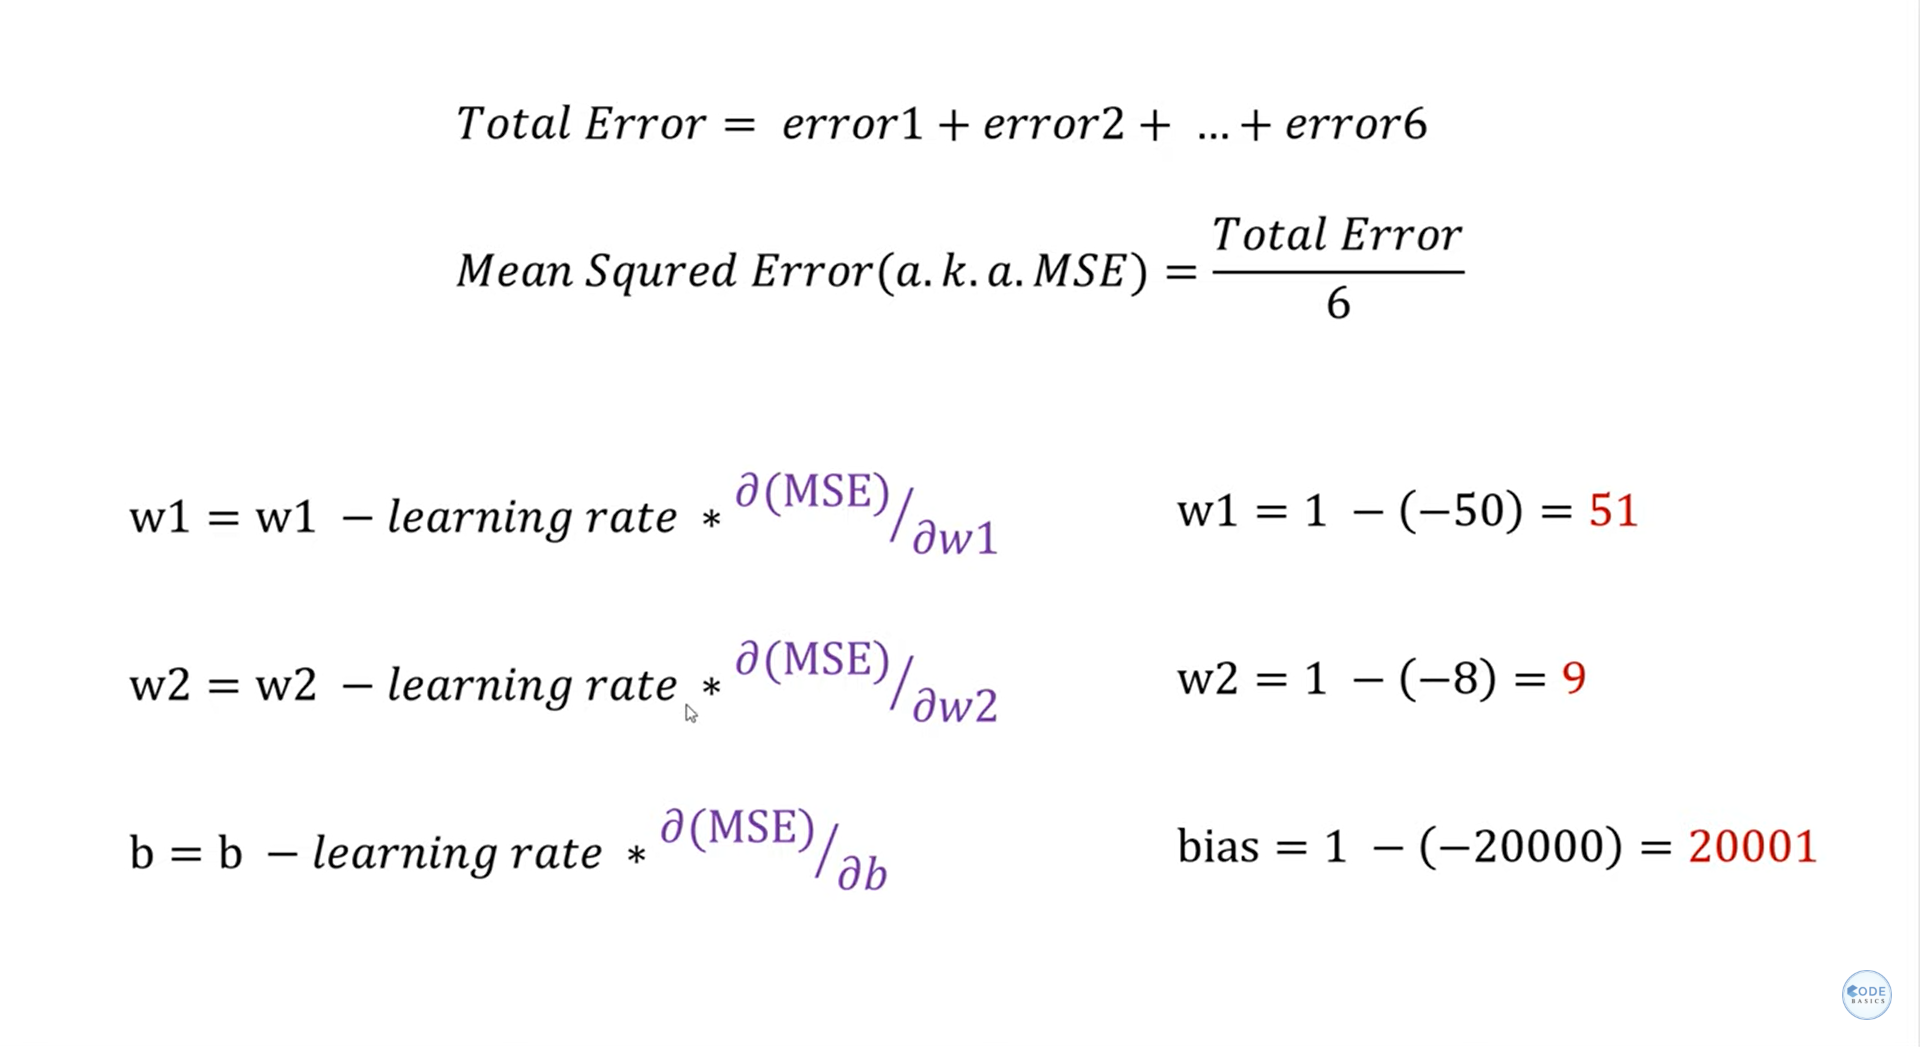 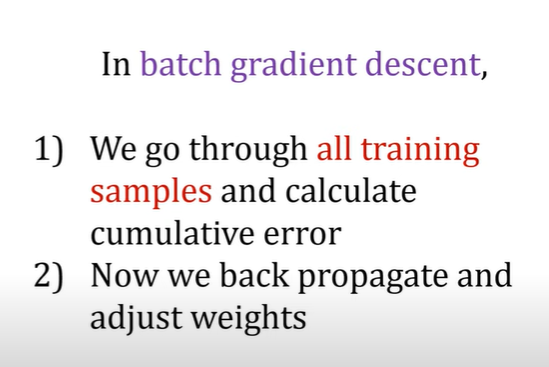 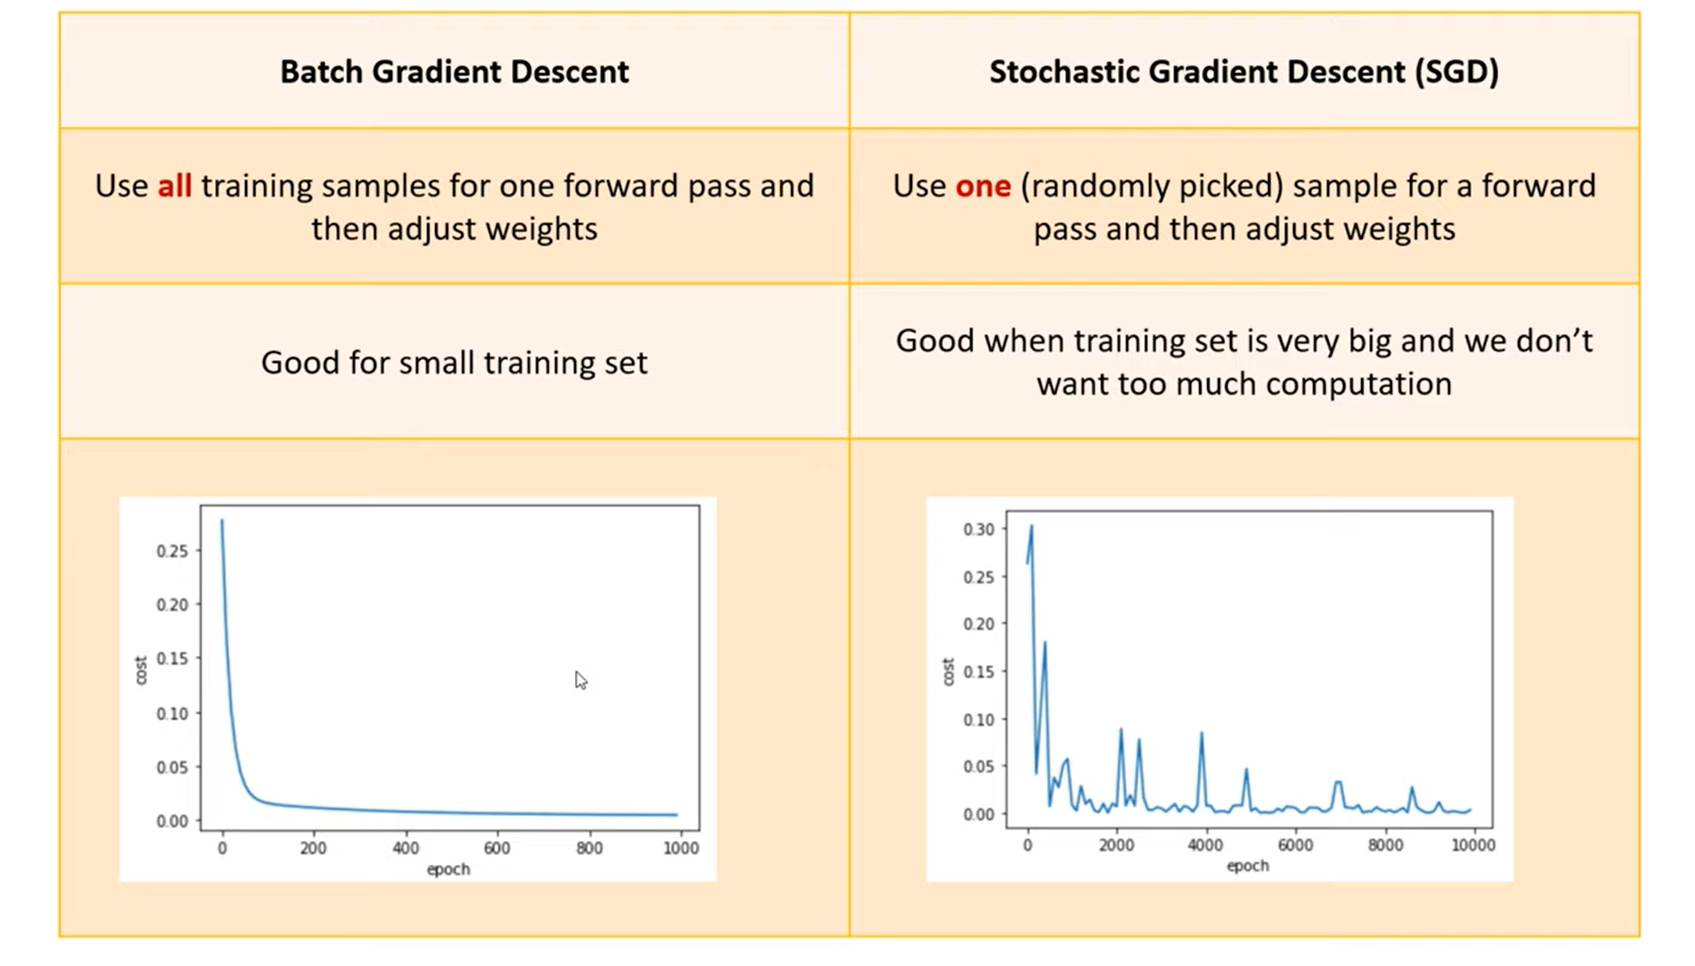 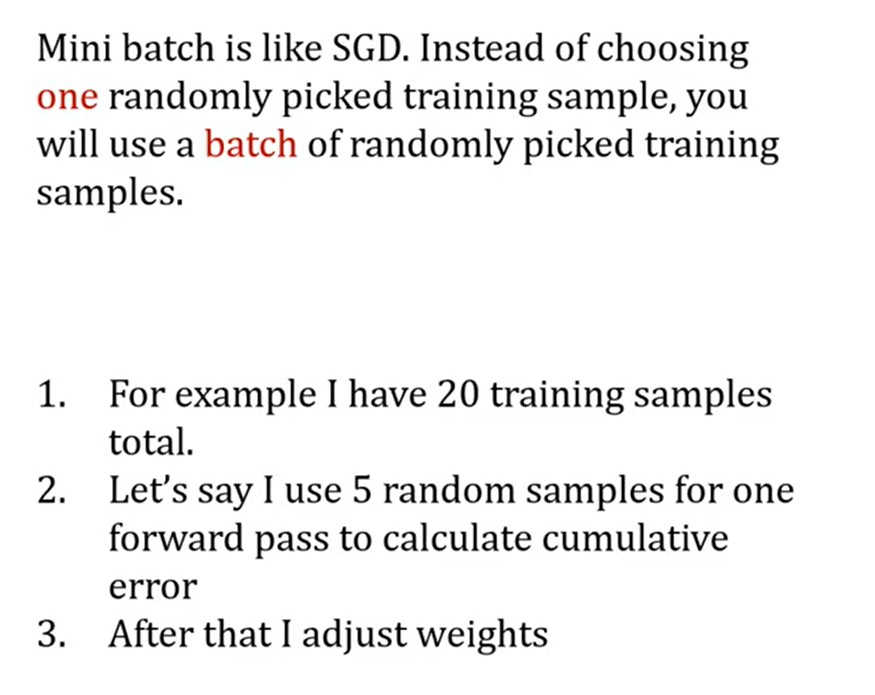 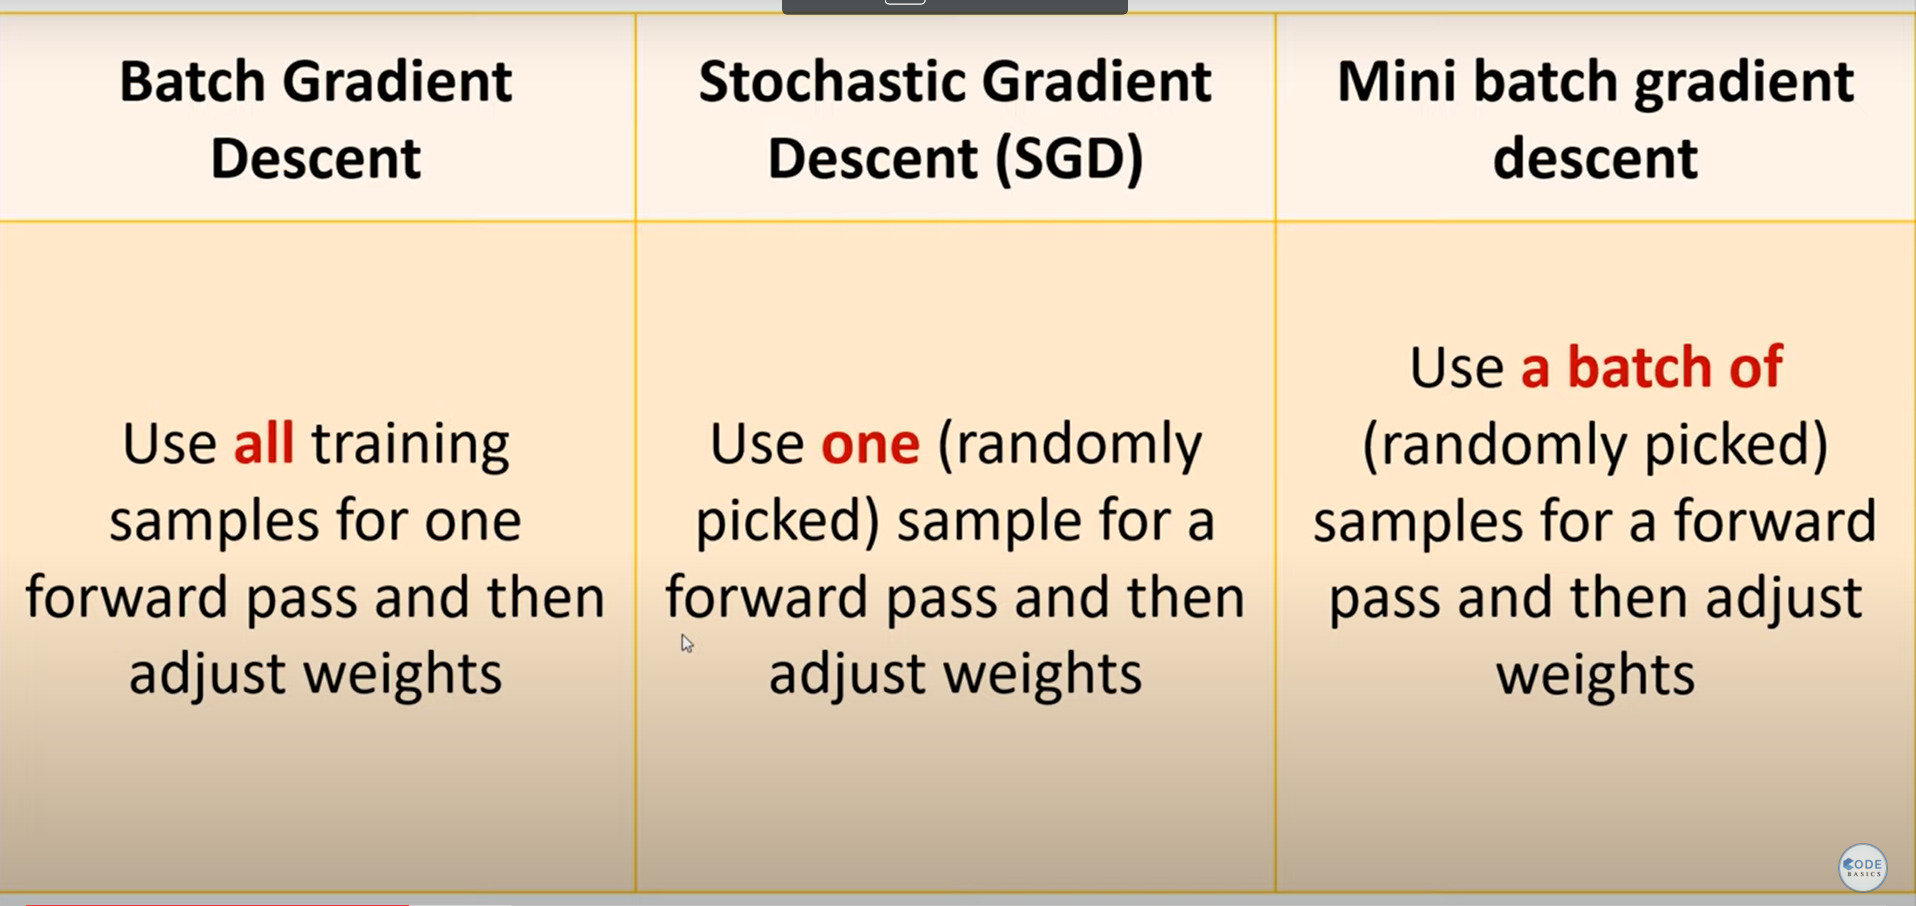

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [4]:
scale_x = sx.fit_transform(df.drop('price', axis = 'columns'))

In [5]:
scale_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scale_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [7]:
scale_x.T.shape

(2, 20)

In [8]:
np.ones(2)

array([1., 1.])

In [9]:
np.ones(2).shape

(2,)

In [10]:
scale_y = sy.fit_transform(df[['price']])

In [11]:
scale_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [12]:
scale_y.T

array([[0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
        0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
        0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
        0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ]])

In [13]:
np.ones(1).shape

(1,)

In [14]:
np.dot(np.ones(1) , scale_y)

ValueError: shapes (1,) and (20,1) not aligned: 1 (dim 0) != 20 (dim 0)

In [18]:
np.dot(np.ones(1) , scale_y.T)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

https://stackoverflow.com/questions/47564495/what-does-numpy-ndarray-shape-do

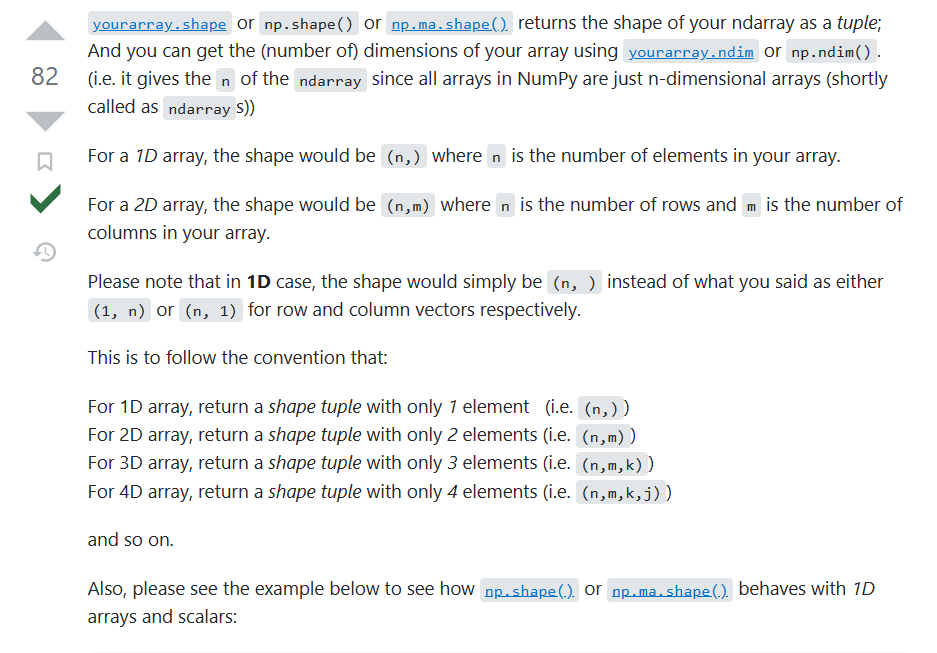

In [19]:
## gardient descent 

In [20]:
w = np.ones(shape = (2))
w

array([1., 1.])

In [21]:
type(w)

numpy.ndarray

In [22]:
scale_y.shape

(20, 1)

In [23]:
scale_y.reshape(scale_y.shape[0])

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [24]:
scale_y.shape

(20, 1)

In [25]:
def gradient(x,y_true , epochs , learning_rate= 0.01 ):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape = (number_of_features))
    
    b = 0 
    
    total_samples = x.shape[0]
    
    cost_list = []
    epcoh_list = []
    
    for i in range(epochs):
        
        print(scale_x.T.shape)
        
        
        y_predicted = np.dot(w,scale_x.T) + b
        
        print(np.dot(w,scale_x.T).shape)
        
        print("predicted_shape" + str(y_predicted.shape))
        
        print("true shape" + str(y_true.shape))
        
        y_predicted = y_predicted.reshape(y_true.shape[0] , )
        
        print("predicted_shape" + str(y_predicted.shape))
        
        print((y_true - y_predicted).shape)
        
        #print(type())
        
        #print((y_true - y_predicted))
        
        #w_gradient = 2/total_samples * np.dot(x.T , (y_predicted - y_true))
        
        w_grad = -(2/total_samples) * (x.T.dot(y_true - y_predicted))
        b_grad =  -(2/total_samples) * np.sum(y_true - y_predicted)
        
        print((x.T.dot(y_true - y_predicted).shape))
        
        print(w_grad.shape)
        
        w = w - learning_rate * w_grad.T
        b = b - learning_rate * b_grad.T
        
        # mean square errror
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10 == 0:
            
            cost_list.append(cost)
            epcoh_list.append(i)
    
    return w , b , cost , cost_list , epoch_list
            

In [26]:
w , b , cost , cost_list , epoch_list = gradient(scale_x,scale_y , 500 )

(2, 20)
(20,)
predicted_shape(20,)
true shape(20, 1)
predicted_shape(20,)
(20, 20)
(2, 20)
(2, 20)
(2, 20)
(20, 20)
predicted_shape(20, 20)
true shape(20, 1)


ValueError: cannot reshape array of size 400 into shape (20,)

In [27]:
scale_x.T.dot(scale_y - 1 )

array([[-2.7944472 ],
       [-4.85172222]])

In [28]:
def batch_gradient_descent(x,y_true,epochs , learning_rate = 0.01 ):
    #print(type(x)) # -> <class 'numpy.ndarray'>
    #print(x.shape)  # -> (20, 2)
    
    number_of_features = x.shape[1]
    #print(number_of_features) -> 2
    
    weights = np.zeros(number_of_features)
    #print(weights)   [1. 1.] (2,)
    #print(weights.shape)
    
    total_samples = x.shape[0]
    
    bias = 0 
    
    cost_list = [] 
    epoch_list = []
    
    for i in range(epochs):
        #print(i) 0-499
        
        #print(y_true)  # (20,1) [[]] 20 values , 1 coulumn 
        
        y_predicted =  np.dot(weights , x.T) + bias # w.x + b 
        #print(y_predicted)
        #print(y_predicted.shape)  # (20,)
        
        deviation = y_true.T - y_predicted
        
        #print(deviation.shape) (1, 20)
        
        w_grad = -(2/total_samples)*(x.T.dot(deviation.T))
        b_grad = -(2/total_samples)*np.sum(deviation)
        
        #print(w_grad.shape)  # (2, 1)
        #print(b_grad.shape)  ()
        
        weights = weights - learning_rate * w_grad.T  # (2,) - (1,2)
        bias = bias - learning_rate * b_grad
        
        #weights = weights.reshape(2,)  -> optional 
        #print(weights.shape)
        
        cost = np.mean(np.square(deviation))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return weights, bias, cost, cost_list, epoch_list
        
        
    
    

In [29]:
weights, bias, cost, cost_list, epoch_list =  batch_gradient_descent(scale_x,scale_y,200000) # -> weights.np.zeros 

In [30]:
weights

array([[0.92274563, 0.2021403 ]])

In [31]:
weights, bias, cost, cost_list, epoch_list =  batch_gradient_descent(scale_x,scale_y,200000) # -> weights.np.ones

In [32]:
weights

array([[0.92274563, 0.2021403 ]])

In [68]:
bias

-0.07396696467388988

In [33]:
### both type of weight initializations converge at around 200000 epochs 

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(scale_x, scale_y)

In [36]:
print(reg.coef_)

print(reg.intercept_)

[[0.92274563 0.2021403 ]]
[-0.07396696]


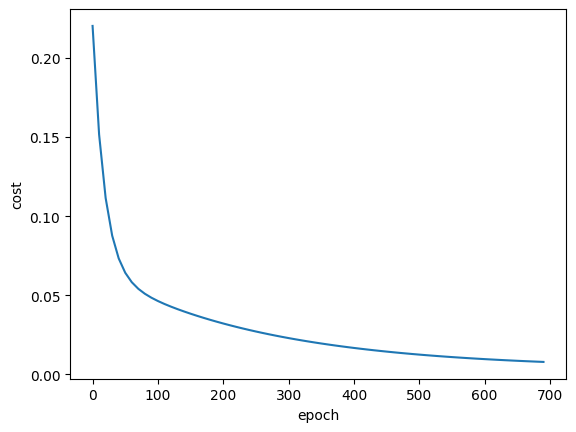

In [44]:
plt.xlabel('epoch')
plt.ylabel('cost')

plt.plot(epoch_list[:70] , cost_list[:70])

In [64]:
def predict(area,bedrooms,w,b):
    
    scaled_x = sx.transform([[area,bedrooms]])
    
    print(scaled_x.shape)
    
    scaled_x = scaled_x[0]
    
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b 
    
    return sy.inverse_transform([[scaled_price]])[0][0]
    
    

In [70]:
predict(2600,4 , weights[0],bias )

(1, 2)


C:\Users\pranj\Desktop\codebasics\Deep learning\dl_tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


119.80088540962772

In [74]:
import random
random.randint(0,6)

3

In [167]:
def stochastic_descent(x,y_true , epochs , learning_rate = 0.01):
    
    number_of_features = x.shape[1]
    weights = np.ones(number_of_features)#(2,)
    #print(weights)
    
    #print(weights.shape)
    
    b = 0 
    
    total_samples = x.shape[0]
    
    cost_list = []
    epcoh_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples - 1)
        
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        #print(sample_x.shape) # (2,)
        #print(sample_x)
        #print(sample_y.shape) # (1,)
        
        y_predicted = np.dot(sample_x , weights.T ) + b  # 1,2 * 2,1 -> 1,1 or (1,)
        
        #print(y_predicted.shape)
        
        difference = sample_y - y_predicted
        
        #print(difference.shape)
        #print(sample_x.shape)
        
        sample_x = sample_x.reshape(1,2)  # transpose not working for some reason  
        
        #print(sample_x.shape)
        #print(difference)
        
       
        w_gradient = - (2/ number_of_features) * np.dot( difference.T , sample_x )  # 1,1 * 1,2 = 1,2
        
        b_gradient = - (2/ number_of_features) * difference
        
        #print(w_gradient)
        
        weights = weights - learning_rate * w_gradient
        
        b = b - learning_rate * b_gradient
        
        cost = np.square(difference)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return weights, b, cost, cost_list, epoch_list        
        
    
    
    

In [170]:
weights_sdg, bias_sdg, cost_sdg, cost_list_sdg, epoch_list_sdg = stochastic_descent(scale_x,scale_y , 200000)


In [178]:
weights_sdg

array([0.9381394, 0.1993307])

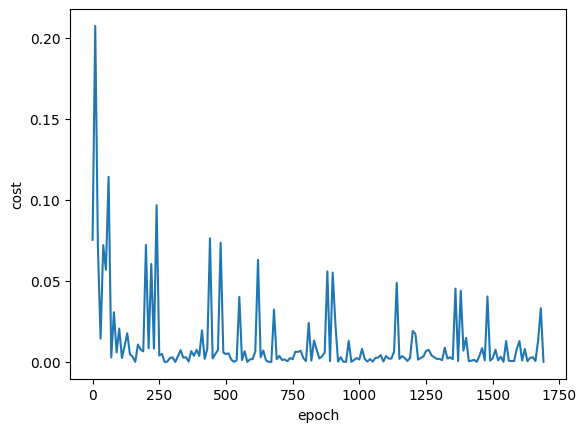

In [175]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sdg[:170] , cost_list_sdg[:170])